# Exploratory Data Analysis (EDA) on Retail Sales Data

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as  plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 10,5  # Adjust the figure size as needed

dataset1=pd.read_csv("C:/Users/Student/Downloads/archive (2)/retail_sales_dataset.csv")
dataset1.head()







,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [53]:
dataset1.isnull().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [54]:
dataset1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [55]:
#Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation) for dataset1.

dataset1.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


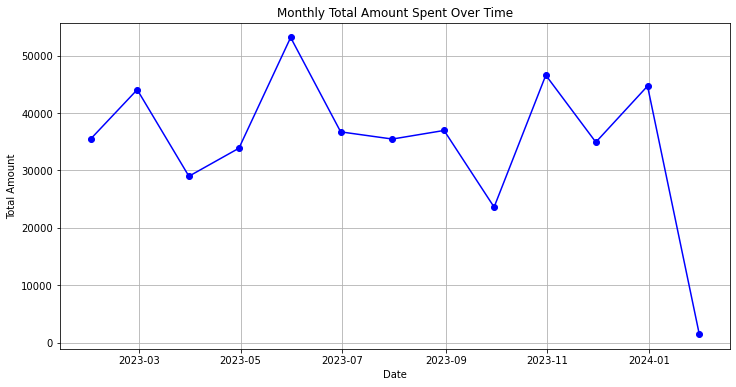

In [56]:

# Convert 'Date' column to datetime format
dataset1['Date'] = pd.to_datetime(dataset1['Date'])

# Set 'Date' column as the index of the DataFrame 
dataset1.set_index('Date', inplace=True)

# Resample data to aggregate at a desired frequency, e.g., monthly
monthly_data = dataset1.resample('M').sum()  # This will aggregate data on a monthly basis, summing up the values

# Plot total amount spent over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Total Amount'], color='blue', marker='o', linestyle='-')
plt.title('Monthly Total Amount Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


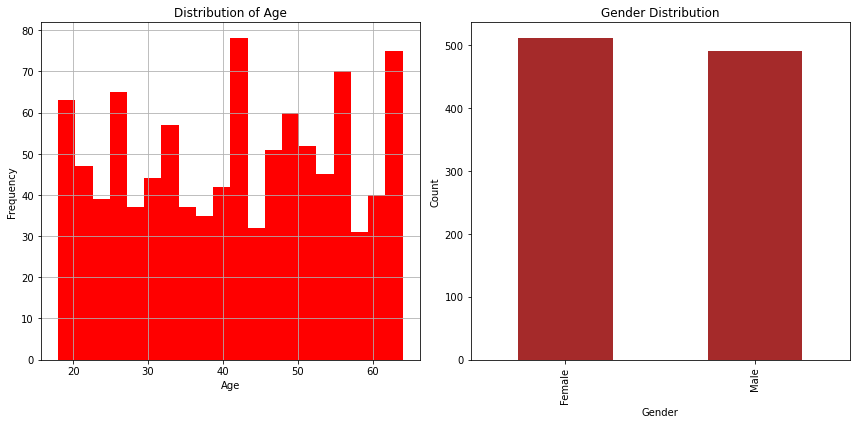

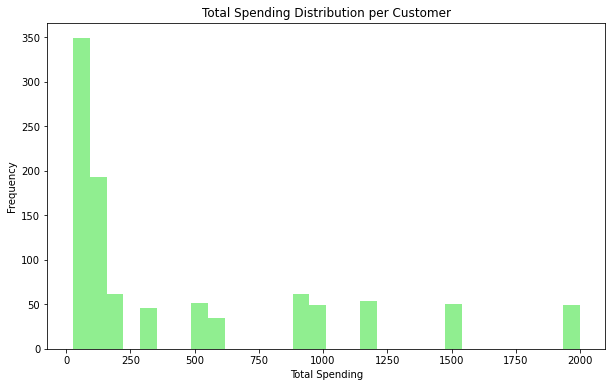

In [63]:

# Visualize customer demographics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dataset1['Age'].hist(bins=20, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
dataset1['Gender'].value_counts().plot(kind='bar', color='brown')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Analyze purchasing behavior
# Calculate total spending per customer
total_spending = dataset1.groupby('Customer ID')['Total Amount'].sum()

# Visualize total spending per customer
plt.figure(figsize=(10, 6))
total_spending.plot(kind='hist', bins=30, color='lightgreen')
plt.title('Total Spending Distribution per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()







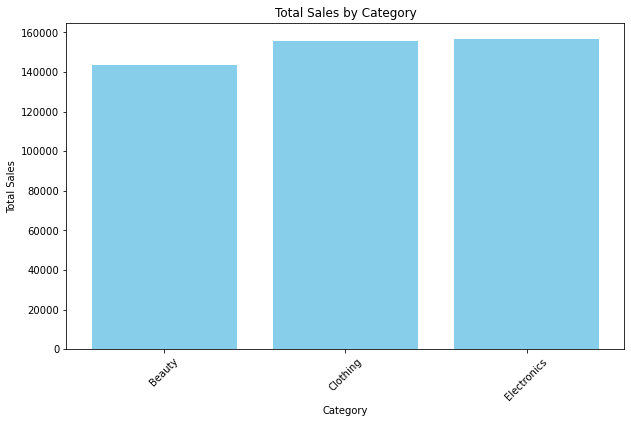

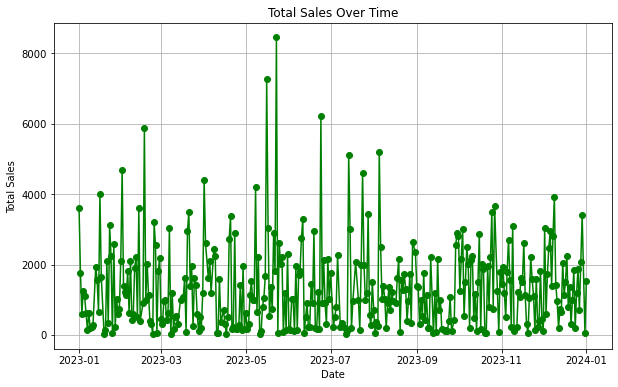

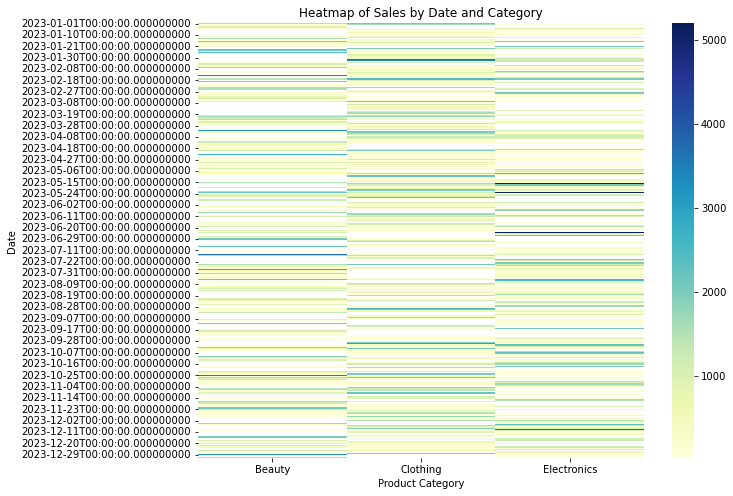

In [69]:
#Ploting a Bar graph
plt.figure(figsize=(10, 6))
sales_by_category = dataset1.groupby('Product Category')['Total Amount'].sum()
plt.bar(sales_by_category.index, sales_by_category.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()
#plot line graph
plt.figure(figsize=(10, 6))
sales_over_time = dataset1.groupby('Date')['Total Amount'].sum()
plt.plot(sales_over_time.index, sales_over_time.values, color='green', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.grid(True)
plt.show()
# Heatmap
sales_pivot_table = dataset1.pivot_table(index='Date', columns='Product Category', values='Total Amount', aggfunc=np.sum)
plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Sales by Date and Category')
plt.xlabel('Product Category')
plt.ylabel('Date')
plt.show()